In [22]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [23]:
X_train.shape

(60000, 28, 28)

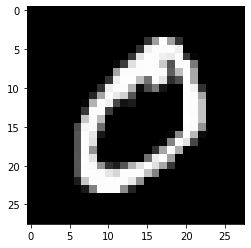

In [25]:
plt.imshow(X_train[1], cmap='gray')

In [29]:
X_train = X_train.astype(float) / 255.0
X_test = X_test.astype(float) / 255.0

In [33]:
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

In [30]:
n_classes = 10
y_train = to_categorical(y_train, num_classes=n_classes)

In [32]:
X_train.mean(), X_train.std()

(0.1306604762738429, 0.3081078038564622)

In [57]:
epochs=100

In [58]:
model1 = Sequential(
    [Dense(64, activation='relu', input_shape=(784, )), 
     Dense(10, activation='softmax')]
)

model1.compile(
    loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'] 
)

history1 = model1.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_split=0.3, verbose=0)

In [59]:
model2 = Sequential(
    [Dense(64, activation='linear', input_shape=(784, )), 
     Dense(10, activation='softmax')]
)

model2.compile(
    loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'] 
)

history2 = model1.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_split=0.3, verbose=0)

In [64]:
model3 = Sequential(
    [Dense(64, activation='relu', input_shape=(784, )), 
     Dense(64, activation='relu', input_shape=(784, )), 
     Dense(64, activation='relu', input_shape=(784, )),
     Dense(10, activation='softmax')]
)

model3.compile(
    loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'] 
)

history3 = model1.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_split=0.3, verbose=0)

Real-world data always contains signal contaminated by noise. We try to build models that can take the most signal.
We can determine whether the model is underfitting or overfitting by analysing the learning curves. If both the validation & training losses decrease, then this is a good sign. If the model underfits, the losses will settle at some plateu and not improve. If the model overfits, after some number of iterations, its validation loss will start increasing. 

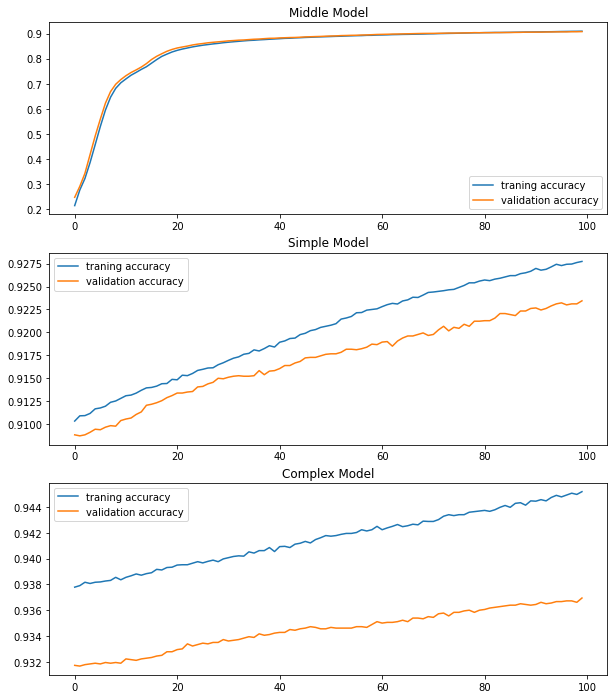

In [65]:
plt.figure(figsize=(10, 12))

plt.subplot(311)
epochs_range = range(epochs)
plt.plot(epochs_range, history1.history['accuracy'], label='traning accuracy')
plt.plot(epochs_range, history1.history['val_accuracy'], label='validation accuracy')
plt.title('Middle Model')
plt.legend()

plt.subplot(312)
plt.plot(epochs_range, history2.history['accuracy'], label='traning accuracy')
plt.plot(epochs_range, history2.history['val_accuracy'], label='validation accuracy')
plt.title('Simple Model')
plt.legend()

plt.subplot(313)
plt.plot(epochs_range, history3.history['accuracy'], label='traning accuracy')
plt.plot(epochs_range, history3.history['val_accuracy'], label='validation accuracy')
plt.title('Complex Model')
plt.legend()